# Statystyka matematyczna - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu:
Członkowie:

---

# Zestaw zadań 5: Próba losowa

In [3]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Dane do zadań

W trakcie wydarzenia sportowego kibice zasiadają na stadionie w 5 różnej wielkości sektorach (1, 2 ...). Po zakończeniu wydarzenia opuszczają oni sektory przez należące do nich wyjścia (1A, 2B, ...) i przemieszczają się w kierunku bramy głównej. Po przejściu przez bramę kibice wsiadają do jednego z 16 autobusów (A01, A02 ...).

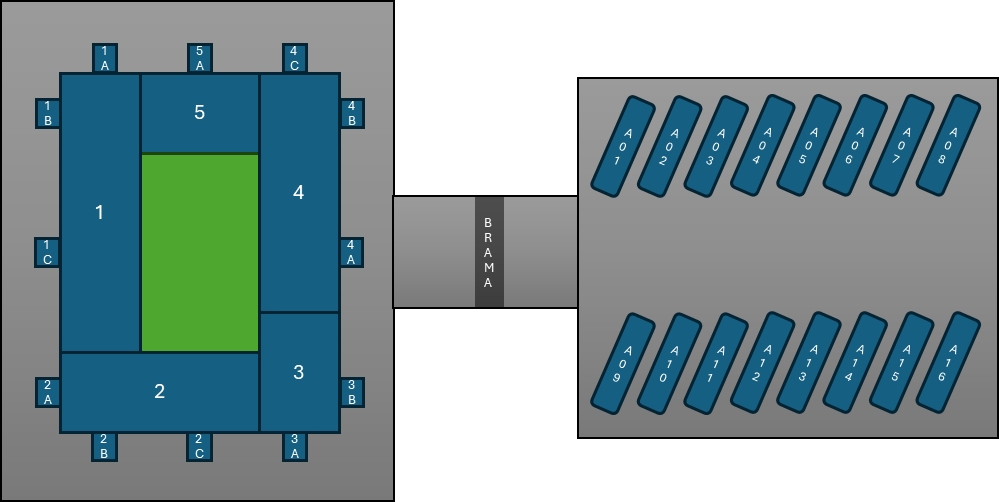

Plik population.csv zawiera informacje o komplecie widzów uczestniczących w imprezie:
 - sektor, w którym zasiadają,
 - wyjście przez które opuszczają stadion,
 - czas jaki zajmuje im dojście do bramy głównej kompleksu,
 - autobus, do którego wsiadają,
 - informacją jakiej odpowiedzi udzielą oni na pytanie o ocenę wydarzenia w skali od 0 do 100.
 
Poniżej przedstawiono wybrane aspekty tej struktury danych:

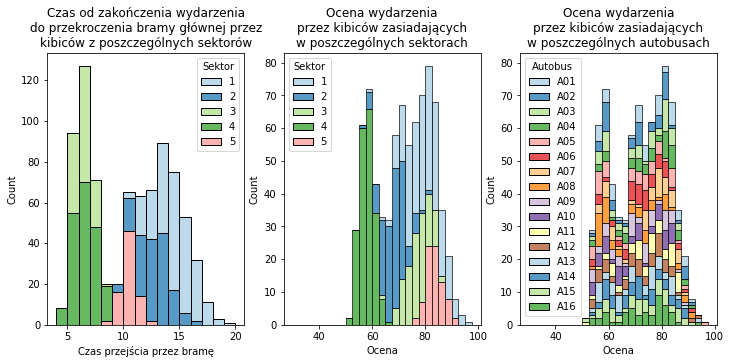

W celu wczytania danych do notatnika umieść plik w tym samym folderze, w którym znajduje się notatnik.

In [4]:
population = pd.read_csv("population.csv", delimiter=",", index_col=0)
population.head(10)

,Sektor,Wyjście,Czas przejścia przez bramę,Ocena,Autobus
0,1,1A,14.241873,83.631834,A01
1,3,3A,5.773992,74.960812,A04
2,3,3B,7.459018,82.321565,A03
3,1,1C,17.536114,77.406691,A03
4,3,3A,6.836955,76.417829,A11
5,1,1C,14.398468,84.699980,A08
6,1,1B,15.228324,79.352084,A12
7,3,3A,5.245370,75.160775,A05
8,4,4A,8.185441,59.802541,A06
9,2,2C,10.940774,73.247603,A08


### Zadanie 1: Próba losowa [16 pkt]

Podczas wydarzenia na terenie kompleksu sportowego znajduje się grupa ankieterów zadających kibicom pytanie o to jak w skali od 0 do 100 oceniają zakończony mecz.
Ponieważ przepytanie wszyskich kibiców jest zbyt czasochłonne wnioski wyciągane będą na podstawie próby losowej.

Wybierz z tablicy część danych, która odpowiada przeprowadzeniu badania według następujących scenariuszy.

Podczas wykonania zadania przydatne mogą się okazać następujące funkcje:
 - `pandas.DataFrame.sample()`
 - `pandas.DataFrame.sort_values()`
 - `pandas.DataFrame.groupby()`
 - `pandas.DataFrame.apply()`
 
Uwaga! Podczas tworzenia tabel nie należy resetować indeksu.

#### a) Scenariusz 1
Ankieterzy przepytują pierwsze 200 osób przekraczające bramę główną. Żadna z osób nie odmawia odpowiedzi na pytanie. Po udzieleniu odpowiedzi osoba przechodzi przez bramę i nie ma możliwości, by zadać pytanie więcej niż raz tej samej osobie.

Wynik zapisz do zmiennej `sample_1`.

<Axes: xlabel='Ocena', ylabel='Count'>

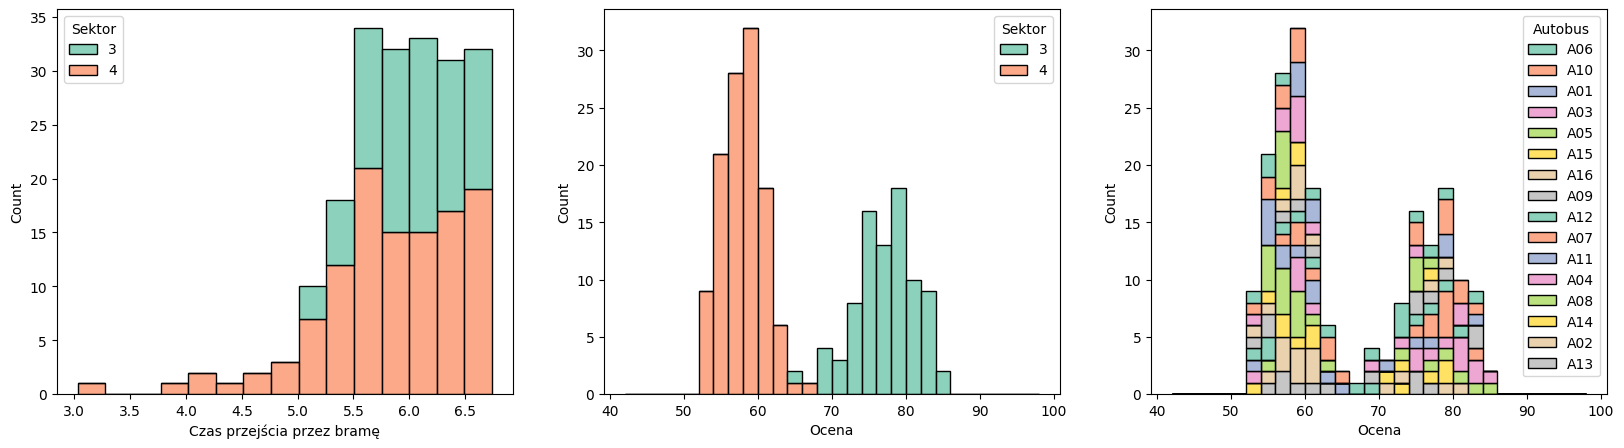

In [5]:
sample_1 = population.sort_values("Czas przejścia przez bramę").head(200)
sample_1

fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.histplot(data = sample_1, x="Czas przejścia przez bramę", hue = "Sektor", palette = "Set2",multiple = "stack", ax = axes[0])
sns.histplot(data = sample_1, x="Ocena", hue = "Sektor", palette = "Set2",multiple="stack", ax = axes[1],bins = np.arange(42,99,2))
sns.histplot(data = sample_1, x="Ocena", hue = "Autobus", palette = "Set2", multiple="stack", ax = axes[2],bins = np.arange(42,99,2))

In [6]:
# Komórka testowa
assert type(sample_1) == pd.DataFrame
assert sample_1.shape == (200, 5)
assert list(sample_1.columns) == ['Sektor', 'Wyjście', 'Czas przejścia przez bramę', 'Ocena', 'Autobus']
assert np.shape(sample_1.index.unique())[0] == 200

#### b) Scenariusz 2
Ankieterzy krążą w tłumie ludzi przemieszczających się do bramy głównej i proszą losowe osoby o odpowiedź na pytanie aż do uzyskania 200 odpowiedzi. Wybrane osoby nie odmawiają odpowiedzi na pytanie nawet jeśli udzielały już wcześniej na nie odpowiedzi.

Wynik zapisz do zmiennej `sample_2`.

<Axes: xlabel='Ocena', ylabel='Count'>

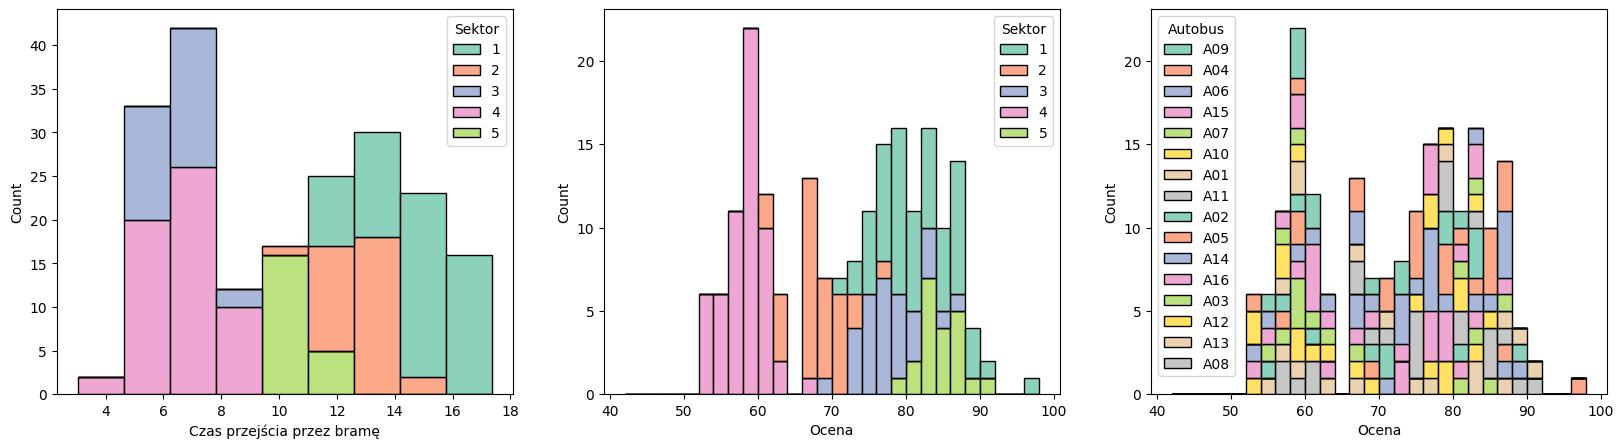

In [7]:
sample_2 = population.sample(n=200, replace = True)
sample_2

fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.histplot(data = sample_2, x="Czas przejścia przez bramę", hue = "Sektor", palette = "Set2",multiple = "stack", ax = axes[0])
sns.histplot(data = sample_2, x="Ocena", hue = "Sektor", palette = "Set2",multiple="stack", ax = axes[1],bins = np.arange(42,99,2))
sns.histplot(data = sample_2, x="Ocena", hue = "Autobus", palette = "Set2", multiple="stack", ax = axes[2],bins = np.arange(42,99,2))

In [8]:
# Komórka testowa
assert type(sample_2) == pd.DataFrame
assert sample_2.shape == (200, 5)
assert list(sample_2.columns) == ['Sektor', 'Wyjście', 'Czas przejścia przez bramę', 'Ocena', 'Autobus']
assert np.shape(sample_2.index.unique())[0] < 200

#### c) Scenariusz 3
Ankieterzy krążą w tłumie ludzi przemieszczających się do bramy głównej i proszą losowe osoby o odpowiedź na pytanie aż do uzyskania 200 odpowiedzi. Wybrane osoby odmawiają odpowiedzi na pytanie tylko jeśli udzielały już wcześniej na nie odpowiedzi.

Wynik zapisz do zmiennej `sample_3`.

<Axes: xlabel='Ocena', ylabel='Count'>

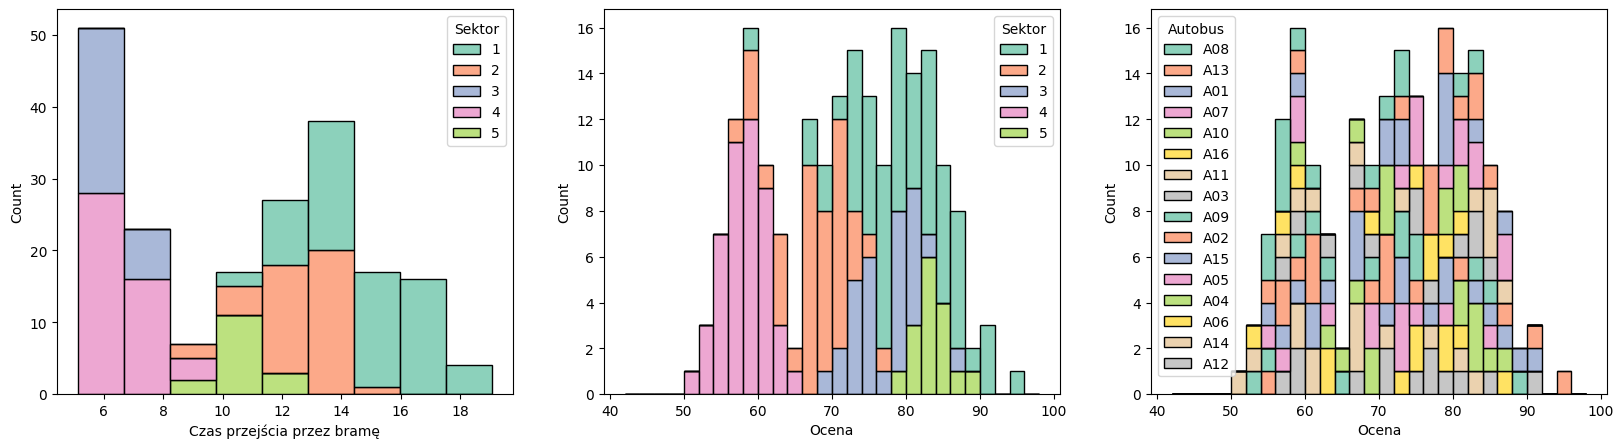

In [9]:
sample_3 = population.sample(n=200, replace = False)
sample_3

fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.histplot(data = sample_3, x="Czas przejścia przez bramę", hue = "Sektor", palette = "Set2",multiple = "stack", ax = axes[0])
sns.histplot(data = sample_3, x="Ocena", hue = "Sektor", palette = "Set2",multiple="stack", ax = axes[1],bins = np.arange(42,99,2))
sns.histplot(data = sample_3, x="Ocena", hue = "Autobus", palette = "Set2", multiple="stack", ax = axes[2],bins = np.arange(42,99,2))

In [10]:
# Komórka testowa
assert type(sample_3) == pd.DataFrame
assert sample_3.shape == (200, 5)
assert list(sample_3.columns) == ['Sektor', 'Wyjście', 'Czas przejścia przez bramę', 'Ocena', 'Autobus']
assert np.shape(sample_3.index.unique())[0] == 200

#### d) Scenariusz 4
Ankieterzy stoją przy bramkach wyjściowych z sektorów i proszą losowo wybrane osoby o odpowiedź na pytanie, aż do momentu uzyskania 200 odpowiedzi (po 40 z każdego sektora). Po udzieleniu odpowiedzi osoba przechodzi przez bramkę i nie ma możliwości, by zadać pytanie więcej niż raz tej samej osobie.

Wynik zapisz do zmiennej `sample_4`.

<Axes: xlabel='Ocena', ylabel='Count'>

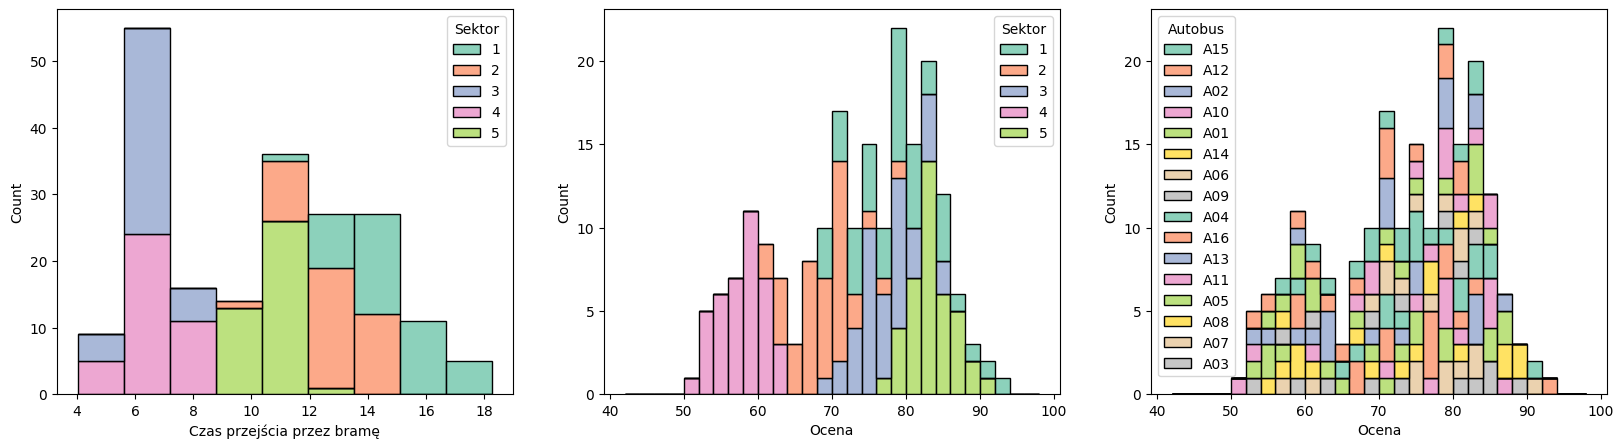

In [11]:
sample_4 = population.groupby("Sektor").sample(n=40)
sample_4

fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.histplot(data = sample_4, x="Czas przejścia przez bramę", hue = "Sektor", palette = "Set2",multiple = "stack", ax = axes[0])
sns.histplot(data = sample_4, x="Ocena", hue = "Sektor", palette = "Set2",multiple="stack", ax = axes[1],bins = np.arange(42,99,2))
sns.histplot(data = sample_4, x="Ocena", hue = "Autobus", palette = "Set2", multiple="stack", ax = axes[2],bins = np.arange(42,99,2))

In [12]:
# Komórka testowa
assert type(sample_4) == pd.DataFrame
assert sample_4.shape == (200, 5)
assert list(sample_4.columns) == ['Sektor', 'Wyjście', 'Czas przejścia przez bramę', 'Ocena', 'Autobus']
assert np.shape(sample_4.index.unique())[0] == 200
assert np.all(np.isclose(sample_4['Sektor'].value_counts().values, 40))

#### e) Scenariusz 5
Ankieterzy stoją przy bramkach wyjściowych z sektorów i proszą losowo wybrane osoby o odpowiedź na pytanie, aż do momentu uzyskania 200 odpowiedzi (z każdego sektora proporcjonalnie do liczby zasiadających w nim osób). Po udzieleniu odpowiedzi osoba przechodzi przez bramkę i nie ma możliwości, by zadać pytanie więcej niż raz tej samej osobie.

Wynik zapisz do zmiennej `sample_5`.

<Axes: xlabel='Ocena', ylabel='Count'>

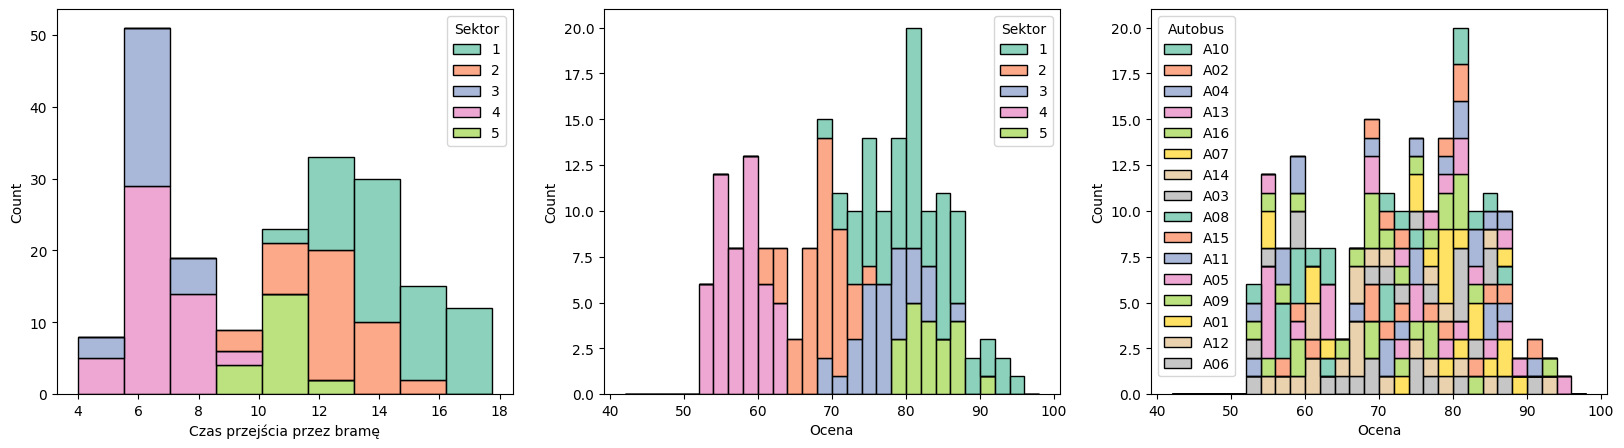

In [13]:
sample_5 = population.groupby("Sektor").sample(frac = 0.25)
sample_5

fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.histplot(data = sample_5, x="Czas przejścia przez bramę", hue = "Sektor", palette = "Set2",multiple = "stack", ax = axes[0])
sns.histplot(data = sample_5, x="Ocena", hue = "Sektor", palette = "Set2",multiple="stack", ax = axes[1],bins = np.arange(42,99,2))
sns.histplot(data = sample_5, x="Ocena", hue = "Autobus", palette = "Set2", multiple="stack", ax = axes[2],bins = np.arange(42,99,2))

In [14]:
# Komórka testowa
assert type(sample_5) == pd.DataFrame
assert sample_5.shape == (200, 5)
assert list(sample_5.columns) == ['Sektor', 'Wyjście', 'Czas przejścia przez bramę', 'Ocena', 'Autobus']
assert np.shape(sample_5.index.unique())[0] == 200
assert np.all(np.isclose(sample_5['Sektor'].value_counts().values, [60, 50, 40, 30, 20]))

#### f) Scenariusz 6
Ankieterzy wybierają losowo 4 autobusy i proszą wszystkie z osób w nich zasiadających o odpowiedź na pytanie. Żadna z osób nie odmawia odpowiedzi na pytanie. Odpowiedzi są zbierane po kolei więc nie ma możliwości, żeby ta sama osoba została zapytana więcej niż jeden raz.

Wynik zapisz do zmiennej `sample_6`.

<Axes: xlabel='Ocena', ylabel='Count'>

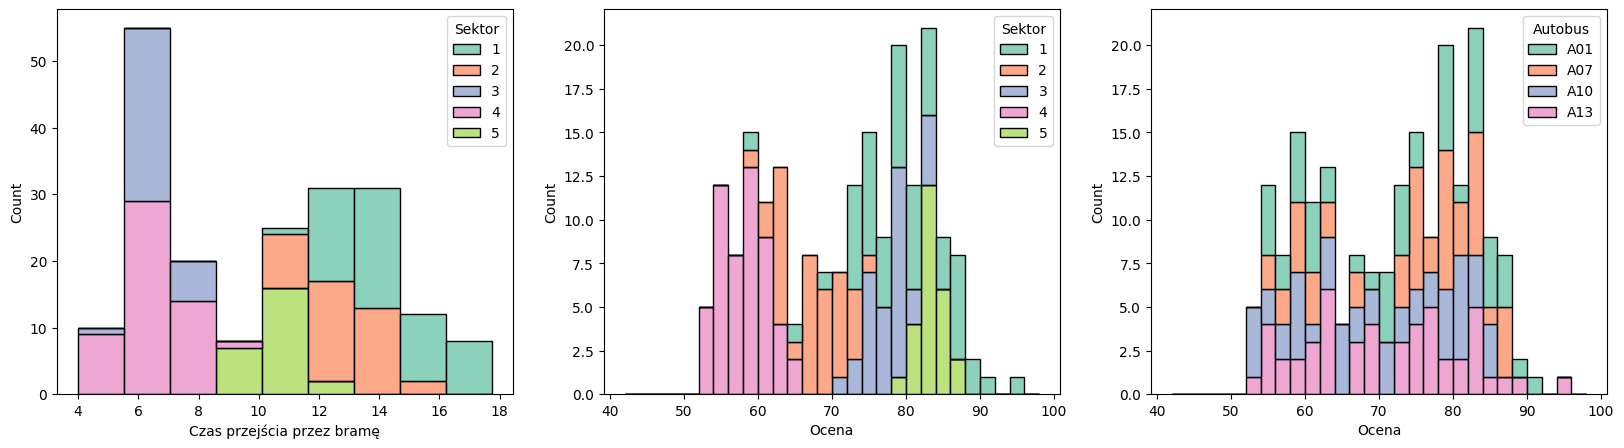

In [15]:
bus = pd.Series(population.loc[:,"Autobus"].unique()).sample(n=4).values

sample_6 = population[population.loc[:,"Autobus"].isin(bus)]
sample_6

fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.histplot(data = sample_6, x="Czas przejścia przez bramę", hue = "Sektor", palette = "Set2",multiple = "stack", ax = axes[0])
sns.histplot(data = sample_6, x="Ocena", hue = "Sektor", palette = "Set2",multiple="stack", ax = axes[1],bins = np.arange(42,99,2))
sns.histplot(data = sample_6, x="Ocena", hue = "Autobus", palette = "Set2", multiple="stack", ax = axes[2],bins = np.arange(42,99,2))

In [16]:
# Komórka testowa
assert type(sample_6) == pd.DataFrame
assert sample_6.shape == (200, 5)
assert list(sample_6.columns) == ['Sektor', 'Wyjście', 'Czas przejścia przez bramę', 'Ocena', 'Autobus']
assert np.shape(sample_6.index.unique())[0] == 200
assert np.shape(sample_6['Autobus'].unique())[0] == 4

#### g) Analiza metod 
Jakie są mocne i słabe strony poszczególnych podeść do zebrania próby losowej? Czy próby uzyskane za pomocą poszczególnych metod są w tym przypadku reprezentatywne?

Scenariusz 1:
Przepytane zostały osoby tylko z dwóch sektorów i nie jest to próba losowa, ponieważ kibice z innych sektorów nie mieli szansy na bycie przepytanym. Ten scenariusz jest najmniej reprezentatywny ze wszystkich.
Scenariusz 2:
Ankieterzy krążą w tłumie, a nie stoją przy bramie co zwiększa losowość i zapobiega przepytaniu tylko tych osób, które miały najbliżej do wyjścia. Niezależnie od sektora każdy ma szansę, aby być przepytanym, lecz nie ma gwarancji uzyskania odpowiedzi dla każdego z nich oraz istnieje ryzyko przepytania tych samych osób kilka razy.
Scenariusz 3:
Bardzo podobny do scenariusza 2 z dodatkowym atutem, ponieważ ankieterzy otrzymają 200 unikatowych odpowiedzi, co zwiększa reprezentatywność próby.
Scenariusz 4:
Ten scenariusz gwarantuje otrzymanie ocen od kibiców z każdego sektora i w tej samej ilości. Minusem tej metody jest fakt, iż dla większych sektorów, próba 40 osób może okazać się zbyt mała, aby dobrze odzwierciedlała oceny wszystkich kibiców na nim zasiadających.
Scenariusz 5:
To rozwiązanie wydaje się być najbardziej odpowiednie, gdyż dla każdego sektora zachowuje odpowiednią proporcję ilości ankietowanych do ilości kibiców.
Scenariusz 6:
Przy założeniu, że autobusy były przydzielane kibicom losowo, ta próba również jest reprezentatywna, gdyż najprawdopodobniej w tych 4 pojazdach fani poszczególnych sektorów rozmieszczą się w proporcjonalnych ilościach. Jednakowoż, jako że transport jest przypisywany losowo, istnieje małe prawdopodobieństwo, że proporcje te nie zostaną zachowane i wśród przepytywanych znajdzie się bardzo mała grupa osób z jakiegoś sektora lub nawet ich brak.
Podsumowując i porównując histogramy otrzymane we wszystkich scenariuszach z histogramem dla całości danych można stwierdzić, że metody od 3 do 6 pokrywają się z nim wystarczająco dobrze, aby uznać je za reprezentatywne.

### Zadanie 2: Reprezentatywność próby losowej - część 1 [6 pkt]

Z populacji o rozkładzie N(172, 7) wylosowano ze zwracaniem 4 próby losowe o identycznej liczebności i następujących parametrach:

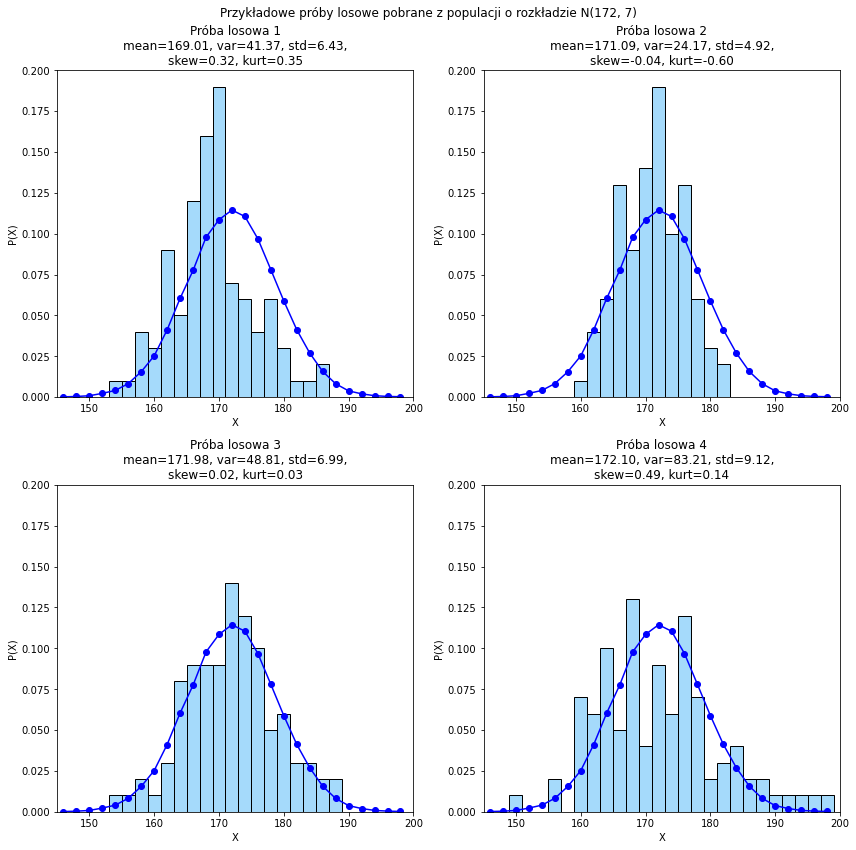

Oceń reprezentatywność powyższych prób. Jaki może być ich wpływ na wyniki przeprowadzonych na ich podstawie analizy?

Próba nr 3 jest najbardziej reprezentatywna, ponieważ jej wartości są najbardziej zbliżone do wartości rozkładu wszystkich danych, więc analiza tej próby da nam rzeczywisty obraz całokształtu populacji. W próbie numer 4 dane są najbardziej rozproszone i najbardziej niesymetryczne. Może to sugerować większy zakres wartości niż w całym rozkładzie i nieprawdziwą przewagę jednej części nad drugą. Z kolei w próbie numer 2 wartości przyjmują najmniejszy zakres, a jednocześnie są bardzo symetryczne, więc tu można dojść do odwrotnych wniosków niż w sytuacji nr 4. W próbie numer 1 dane są zarówno niesymetryczne, jak i średnia próby najbardziej ze wszystkich odbiega od średniej całego rozkładu. Porównując histogramy z krzywą całej populacji można wywnioskować, że próby o numerach 1 i 4 nie są reprezentatywne, próba numer 2 lepiej odzwierciedla całość danych, lecz najlepsza jest próba numer 3.

### Zadanie 3:  Reprezentatywność próby losowej - część 2 [6 pkt]

Z populacji o rozkładzie N(172, 7) wylosowano ze zwracaniem 5000 prób losowych o liczebności 100. Na podstawie każdej z prób wyliczono jej wartość średnią, wariancję i odchylenie standardowe. Poniżej przedstawiono rozkłady wyliczonych parametrów:

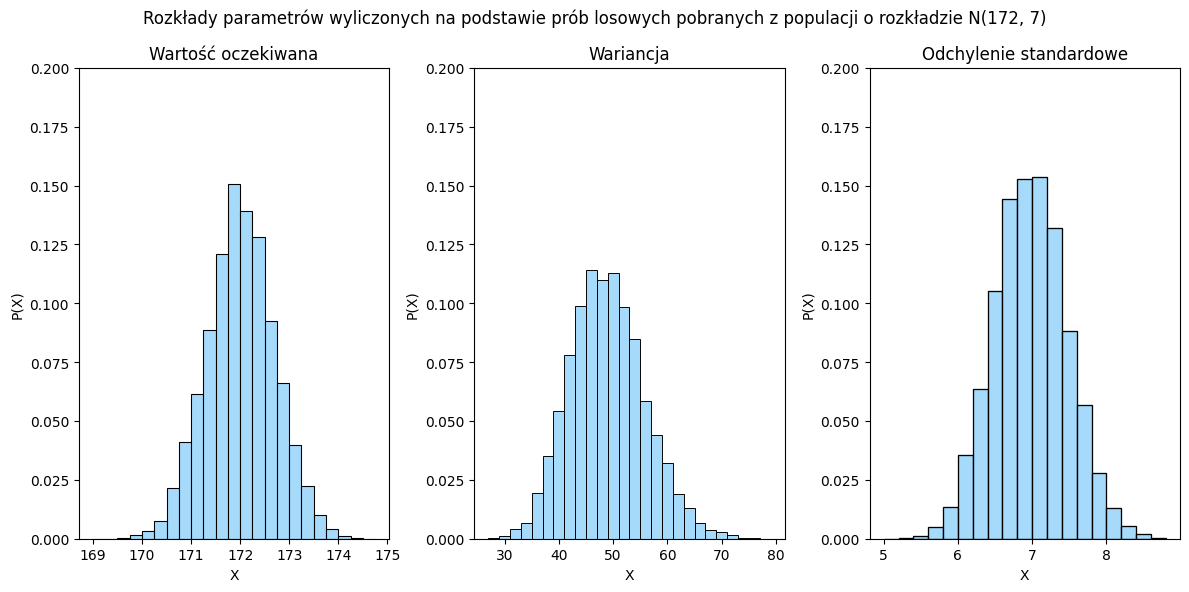

Oceń w jaki sposób reprezentatywność próby losowej może wpływać na wyniki przeprowadzonych na jej podstawie analizy?

Jeśli próba jest reprezentatywna dla ogółu populacji, to znaczy, że dobrze odzwierciedla jej cechy, takie jak średnia, wariancja i odchylenia standardowe. Dzięki temu, wnioski wyciągnięte z analizy tejże próby mogą być uznane za wiarygodne i mogą być generalizowane na całą populację. 
W przypadku, gdy próba nie jest reprezentatywna, może to prowadzić do błędnych wniosków. Na przykład, jeśli w próbie losowej przeważają pewne wartości kosztem innych, które występują w populacji lub cechy takie jak wariancja czy odchylenie standardowe różnią się od ogółu to analiza może wskazywać na niewłaściwe tendencje, zależności i rozkład, które nie są obecne w całej populacji.